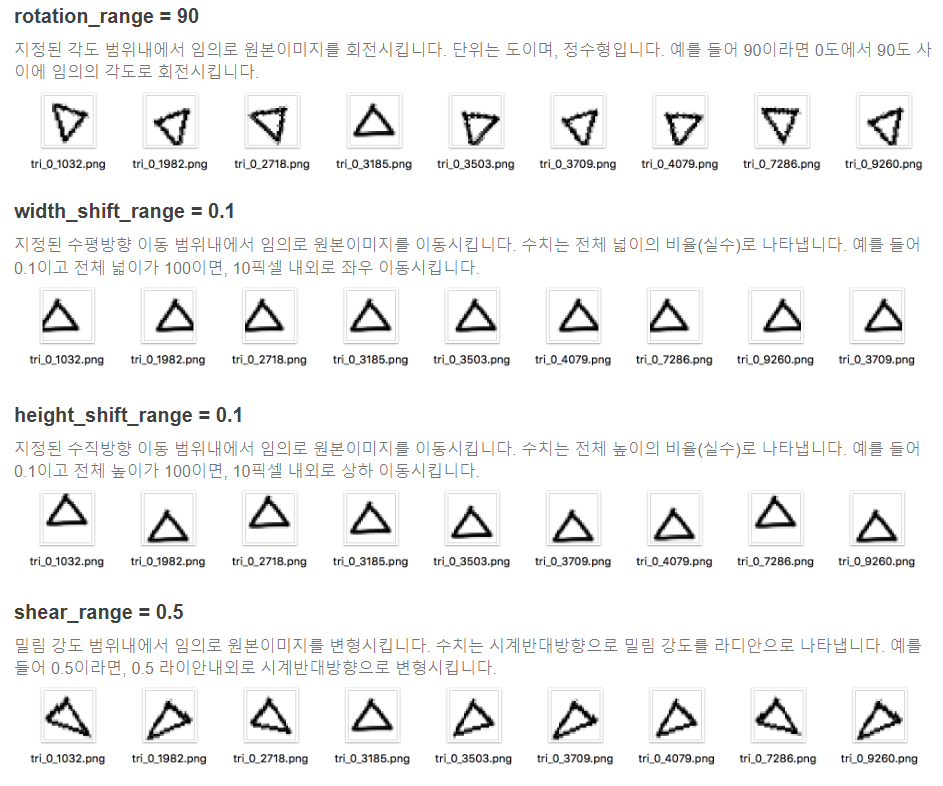
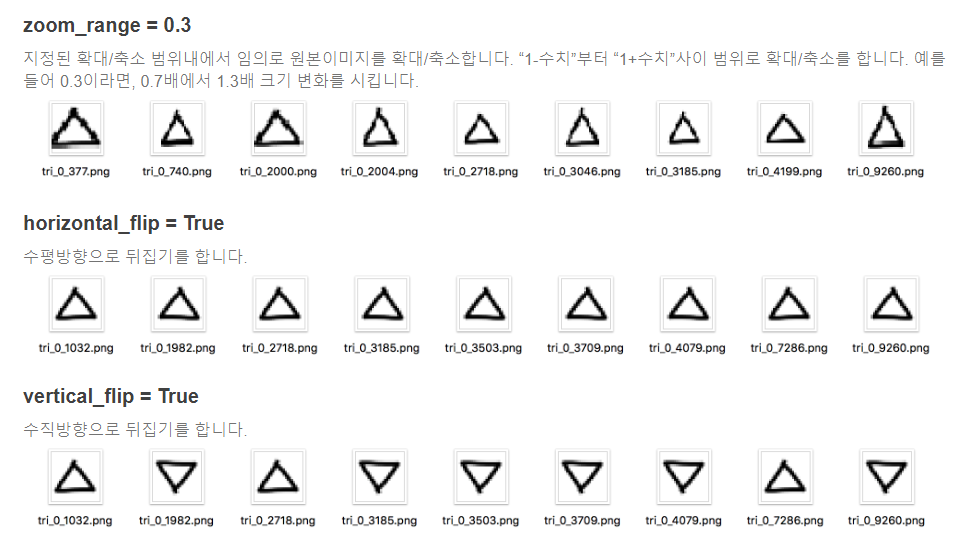

In [1]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
# rotation_range: 지정된 각도 범위내에서 임의로 원본이미지를 회전
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/200


C:\Users\TJ\AppData\Local\Temp\ipykernel_9660\3480276610.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


15/15 [==============================] - 1s 32ms/step - loss: 1.2974 - accuracy: 0.2000 - val_loss: 1.0921 - val_accuracy: 0.3333
Epoch 2/200
15/15 [==============================] - 0s 17ms/step - loss: 1.1104 - accuracy: 0.2222 - val_loss: 1.0869 - val_accuracy: 0.5333
Epoch 3/200
15/15 [==============================] - 0s 17ms/step - loss: 1.0934 - accuracy: 0.3556 - val_loss: 1.0724 - val_accuracy: 0.5333
Epoch 4/200
15/15 [==============================] - 0s 17ms/step - loss: 1.0764 - accuracy: 0.4667 - val_loss: 1.0507 - val_accuracy: 0.4667
Epoch 5/200
15/15 [==============================] - 0s 17ms/step - loss: 1.0713 - accuracy: 0.4444 - val_loss: 1.0763 - val_accuracy: 0.5333
Epoch 6/200
15/15 [==============================] - 0s 16ms/step - loss: 0.9922 - accuracy: 0.3778 - val_loss: 1.1103 - val_accuracy: 0.4667
Epoch 7/200
15/15 [==============================] - 0s 16ms/step - loss: 0.9415 - accuracy: 0.5778 - val_loss: 1.2760 - val_accuracy: 0.3333
Epoch 8/200
15/15 

15/15 [==============================] - 0s 16ms/step - loss: 0.4196 - accuracy: 0.8444 - val_loss: 1.9105 - val_accuracy: 0.5333
Epoch 59/200
15/15 [==============================] - 0s 16ms/step - loss: 0.4635 - accuracy: 0.8444 - val_loss: 1.6401 - val_accuracy: 0.6667
Epoch 60/200
15/15 [==============================] - 0s 17ms/step - loss: 0.6756 - accuracy: 0.6889 - val_loss: 1.4799 - val_accuracy: 0.7333
Epoch 61/200
15/15 [==============================] - 0s 16ms/step - loss: 0.3964 - accuracy: 0.8222 - val_loss: 1.5598 - val_accuracy: 0.6667
Epoch 62/200
15/15 [==============================] - 0s 17ms/step - loss: 0.4070 - accuracy: 0.8000 - val_loss: 1.6514 - val_accuracy: 0.7333
Epoch 63/200
15/15 [==============================] - 0s 16ms/step - loss: 0.3710 - accuracy: 0.9111 - val_loss: 1.5991 - val_accuracy: 0.8000
Epoch 64/200
15/15 [==============================] - 0s 18ms/step - loss: 0.4919 - accuracy: 0.8222 - val_loss: 1.8255 - val_accuracy: 0.6667
Epoch 65/200

15/15 [==============================] - 0s 16ms/step - loss: 0.2655 - accuracy: 0.8667 - val_loss: 2.4036 - val_accuracy: 0.5333
Epoch 116/200
15/15 [==============================] - 0s 16ms/step - loss: 0.2641 - accuracy: 0.8667 - val_loss: 2.1452 - val_accuracy: 0.6667
Epoch 117/200
15/15 [==============================] - 0s 16ms/step - loss: 0.2229 - accuracy: 0.9111 - val_loss: 2.1729 - val_accuracy: 0.7333
Epoch 118/200
15/15 [==============================] - 0s 16ms/step - loss: 0.1635 - accuracy: 0.9556 - val_loss: 1.9340 - val_accuracy: 0.8667
Epoch 119/200
15/15 [==============================] - 0s 16ms/step - loss: 0.1310 - accuracy: 0.9556 - val_loss: 1.9471 - val_accuracy: 0.7333
Epoch 120/200
15/15 [==============================] - 0s 17ms/step - loss: 0.1626 - accuracy: 0.9333 - val_loss: 3.0073 - val_accuracy: 0.5333
Epoch 121/200
15/15 [==============================] - 0s 17ms/step - loss: 0.2008 - accuracy: 0.9111 - val_loss: 2.1734 - val_accuracy: 0.8667
Epoch 

Epoch 172/200
15/15 [==============================] - 0s 15ms/step - loss: 0.1055 - accuracy: 0.9556 - val_loss: 2.1619 - val_accuracy: 0.8667
Epoch 173/200
15/15 [==============================] - 0s 15ms/step - loss: 0.0494 - accuracy: 0.9778 - val_loss: 2.1763 - val_accuracy: 0.8667
Epoch 174/200
15/15 [==============================] - 0s 15ms/step - loss: 0.1236 - accuracy: 0.9111 - val_loss: 2.2139 - val_accuracy: 0.8667
Epoch 175/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0617 - accuracy: 0.9778 - val_loss: 2.4094 - val_accuracy: 0.8667
Epoch 176/200
15/15 [==============================] - 0s 16ms/step - loss: 0.1352 - accuracy: 0.9778 - val_loss: 2.0635 - val_accuracy: 0.8667
Epoch 177/200
15/15 [==============================] - 0s 17ms/step - loss: 0.1671 - accuracy: 0.9556 - val_loss: 1.8465 - val_accuracy: 0.8667
Epoch 178/200
15/15 [==============================] - 0s 17ms/step - loss: 0.1054 - accuracy: 0.9333 - val_loss: 2.3247 - val_accuracy:

C:\Users\TJ\AppData\Local\Temp\ipykernel_9660\3480276610.py:66: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(
C:\Users\TJ\AppData\Local\Temp\ipykernel_9660\3480276610.py:75: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model.predict_generator(


[[0.000 0.000 1.000]
 [0.997 0.003 0.000]
 [0.000 0.000 1.000]
 [0.000 0.998 0.002]
 [0.004 0.996 0.000]
 [0.973 0.027 0.000]
 [0.000 0.000 1.000]
 [0.185 0.815 0.000]
 [0.987 0.013 0.000]
 [0.001 0.992 0.007]
 [0.000 0.000 1.000]
 [0.000 0.003 0.997]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.976 0.024]]


In [2]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/200


C:\Users\TJ\AppData\Local\Temp\ipykernel_9660\2783648284.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


15/15 [==============================] - 1s 28ms/step - loss: 1.1859 - accuracy: 0.2889 - val_loss: 1.0898 - val_accuracy: 0.4667
Epoch 2/200
15/15 [==============================] - 0s 16ms/step - loss: 1.0611 - accuracy: 0.4667 - val_loss: 1.1259 - val_accuracy: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 16ms/step - loss: 0.9749 - accuracy: 0.4889 - val_loss: 1.0847 - val_accuracy: 0.3333
Epoch 4/200
15/15 [==============================] - 0s 16ms/step - loss: 0.9021 - accuracy: 0.5778 - val_loss: 1.1566 - val_accuracy: 0.4000
Epoch 5/200
15/15 [==============================] - 0s 17ms/step - loss: 0.9184 - accuracy: 0.5111 - val_loss: 0.8216 - val_accuracy: 0.4667
Epoch 6/200
15/15 [==============================] - 0s 17ms/step - loss: 0.8147 - accuracy: 0.5778 - val_loss: 1.3706 - val_accuracy: 0.3333
Epoch 7/200
15/15 [==============================] - 0s 17ms/step - loss: 0.6060 - accuracy: 0.8000 - val_loss: 1.7674 - val_accuracy: 0.4000
Epoch 8/200
15/15 

Epoch 58/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.6396e-04 - val_accuracy: 1.0000
Epoch 59/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 1.4629e-04 - val_accuracy: 1.0000
Epoch 60/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0829 - accuracy: 0.9556 - val_loss: 2.9050e-04 - val_accuracy: 1.0000
Epoch 61/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0739 - accuracy: 0.9556 - val_loss: 7.8072e-05 - val_accuracy: 1.0000
Epoch 62/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 63/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 3.7972e-05 - val_accuracy: 1.0000
Epoch 64/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 1.5497e-0

15/15 [==============================] - 0s 16ms/step - loss: 0.0663 - accuracy: 0.9778 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 115/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 116/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0452 - accuracy: 0.9778 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 117/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 118/200
15/15 [==============================] - 0s 15ms/step - loss: 0.0414 - accuracy: 0.9778 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 119/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0321 - accuracy: 0.9778 - val_loss: 7.3693e-04 - val_accuracy: 1.0000
Epoch 120/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0782 - accuracy: 0.9556 - val_loss: 1.7380e-05 - val_accuracy: 1.000

Epoch 170/200
15/15 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.9778 - val_loss: 1.2716e-07 - val_accuracy: 1.0000
Epoch 171/200
15/15 [==============================] - 0s 15ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.5100e-07 - val_accuracy: 1.0000
Epoch 172/200
15/15 [==============================] - 0s 15ms/step - loss: 1.1984e-04 - accuracy: 1.0000 - val_loss: 2.5967e-05 - val_accuracy: 1.0000
Epoch 173/200
15/15 [==============================] - 0s 15ms/step - loss: 7.7425e-04 - accuracy: 1.0000 - val_loss: 5.8970e-05 - val_accuracy: 1.0000
Epoch 174/200
15/15 [==============================] - 0s 15ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.0132e-05 - val_accuracy: 1.0000
Epoch 175/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 6.9141e-07 - val_accuracy: 1.0000
Epoch 176/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 1.0000 - 

C:\Users\TJ\AppData\Local\Temp\ipykernel_9660\2783648284.py:65: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(
C:\Users\TJ\AppData\Local\Temp\ipykernel_9660\2783648284.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model.predict_generator(


[[0.001 0.999 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]]
